In [3]:
from sklearn.datasets import load_digits
import pylab as pl
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(1797, 64)


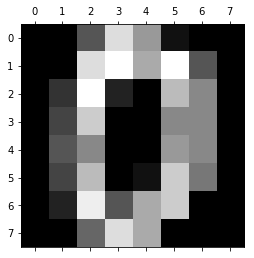

In [2]:
digits=load_digits()#载入数据集
print(digits.data.shape)
pl.gray()#灰度化图片
pl.matshow(digits.images[0])
pl.show()

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def dsigmoid(x):
    return x*(1-x)

class NeuralNetwork:
    def __init__(self,layers):
        #权值的初始化，范围-1,1
        self.V=np.random.random((layers[0]+1,layers[1]+1))*2-1
        self.W=np.random.random((layers[1]+1,layers[2]))*2-1
    def train(self,X,y,lr=0.11,epochs=10000):
        #添加偏置
        temp=np.ones([X.shape[0],X.shape[1]+1])
        temp[:,0:-1]=X
        X=temp
        
        for n in range(epochs+1):
            i=np.random.randint(X.shape[0])#随机抽取一行数据
            x=[X[i]]
            x=np.atleast_2d(x)#转为2维数据
            L1=sigmoid(np.dot(x,self.V))#隐藏层输出
            L2=sigmoid(np.dot(L1,self.W))#输出层输出
            
            L2_delta=(y[i]-L2)*dsigmoid(L2)
            L1_delta=L2_delta.dot(self.W.T)*dsigmoid(L1)
            
            self.W+=lr*L1.T.dot(L2_delta)
            self.V+=lr*x.T.dot(L1_delta)
            
            if n%1000==0:
                predictions=[]
                for j in range(X_test.shape[0]):
                    o=self.predict(X_test[j])
                    predictions.append(np.argmax(o))
                accuracy=np.mean(np.equal(predictions,y_test))
                print('epoch:',n,'accuracy:',accuracy)
    def predict(self,x):
            temp=np.ones(x.shape[0]+1)
            temp[0:-1]=x
            x=temp
            x=np.atleast_2d(x)
            L1=sigmoid(np.dot(x,self.V))#隐藏层输出
            L2=sigmoid(np.dot(L1,self.W))#输出层输出
            return L2

        
digits=load_digits()
X=digits.data
y=digits.target
X-=X.min()
X/=X.max()
nm=NeuralNetwork([64,100,10])
X_train,X_test,y_train,y_test=train_test_split(X,y)#分割训练集 测试集
#标签二值化
label_train=LabelBinarizer().fit_transform(y_train)
label_test=LabelBinarizer().fit_transform(y_test)

print('start')
nm.train(X_train,label_train,epochs=20000)

print('end')
            

start
epoch: 0 accuracy: 0.104444444444
epoch: 1000 accuracy: 0.611111111111
epoch: 2000 accuracy: 0.715555555556
epoch: 3000 accuracy: 0.908888888889
epoch: 4000 accuracy: 0.908888888889
epoch: 5000 accuracy: 0.924444444444
epoch: 6000 accuracy: 0.944444444444
epoch: 7000 accuracy: 0.948888888889
epoch: 8000 accuracy: 0.942222222222
epoch: 9000 accuracy: 0.942222222222
epoch: 10000 accuracy: 0.944444444444
epoch: 11000 accuracy: 0.951111111111
epoch: 12000 accuracy: 0.951111111111
epoch: 13000 accuracy: 0.96
epoch: 14000 accuracy: 0.964444444444
epoch: 15000 accuracy: 0.962222222222
epoch: 16000 accuracy: 0.957777777778
epoch: 17000 accuracy: 0.96
epoch: 18000 accuracy: 0.966666666667
epoch: 19000 accuracy: 0.968888888889
epoch: 20000 accuracy: 0.966666666667
end
